In [12]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [23]:
apiKey = "03a72fe422bc63089881e983ab9243b2"
ticker = "MELI"

In [27]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=anual' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:10] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,-707000.0,104992000,-70315000.0,130305000.0,772828000,-509910000.0,-106981000.0,584281000,0.000000e+00,...,242266000,-115837000,1056800000,2508224000,1451424000,1182552000,-247141000,935411000,NaN,NaN
2019-12-31,NaN,-171999000.0,73320000,16453000.0,395000.0,1691637000,-507000.0,-4148000.0,143495000,2.036536e+09,...,2021012000,-37584000,986729000,1427061000,440332000,451091000,-136798000,314221000,NaN,NaN
2018-12-31,NaN,-36585000.0,45792000,-92585000.0,27525000.0,26012000,-27105000.0,-3015000.0,90123000,3.448990e+08,...,608882000,-90895000,76435000,464695000,388260000,230907000,-93136000,133153000,NaN,NaN
2017-12-31,NaN,13780000.0,40921000,-24575000.0,35719000.0,26027000,-21817000.0,-1549000.0,150215000,3.188870e+08,...,-50903000,-41346000,154120000,388260000,234140000,269010000,-55156000,194126000,NaN,NaN
2016-12-31,NaN,136366000.0,29022000,-6188000.0,22983000.0,70162000,-15428000.0,-787000.0,47980000,2.928600e+08,...,-19668000,-19089000,67259000,234140000,166881000,190259000,-68527000,112889000,NaN,NaN


In [28]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,-707000.0,104992000,-70315000.0,130305000.0,772828000,-509910000.0,-106981000.0,584281000,0.000000e+00,...,242266000,-115837000,1056800000,2508224000,1451424000,1182552000,-247141000,935411000,NaN,NaN
2019-12-31,NaN,-171999000.0,73320000,16453000.0,395000.0,1691637000,-507000.0,-4148000.0,143495000,2.036536e+09,...,2021012000,-37584000,986729000,1427061000,440332000,451091000,-136798000,314221000,NaN,NaN
2018-12-31,NaN,-36585000.0,45792000,-92585000.0,27525000.0,26012000,-27105000.0,-3015000.0,90123000,3.448990e+08,...,608882000,-90895000,76435000,464695000,388260000,230907000,-93136000,133153000,NaN,NaN
2017-12-31,NaN,13780000.0,40921000,-24575000.0,35719000.0,26027000,-21817000.0,-1549000.0,150215000,3.188870e+08,...,-50903000,-41346000,154120000,388260000,234140000,269010000,-55156000,194126000,NaN,NaN
2016-12-31,NaN,136366000.0,29022000,-6188000.0,22983000.0,70162000,-15428000.0,-787000.0,47980000,2.928600e+08,...,-19668000,-19089000,67259000,234140000,166881000,190259000,-68527000,112889000,NaN,NaN


In [29]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0.0,294047000.0,-177210000.0,216927000.0,2.586666e+09,-574767000.0,-116480000.0,1.016094e+09,2.993182e+09,440558000.0,...,2.801589e+09,-304751000.0,2.341343e+09,5.022380e+09,2.681037e+09,2.323819e+09,-600758000.0,1.689800e+09,0.0,0.0
2020-12-31,NaN,104992000.0,-70315000.0,130305000.0,7.728280e+08,-509910000.0,-106981000.0,5.842810e+08,0.000000e+00,102384000.0,...,2.422660e+08,-115837000.0,1.056800e+09,2.508224e+09,1.451424e+09,1.182552e+09,-247141000.0,9.354110e+08,NaN,NaN
2019-12-31,NaN,73320000.0,16453000.0,395000.0,1.691637e+09,-507000.0,-4148000.0,1.434950e+08,2.036536e+09,128768000.0,...,2.021012e+09,-37584000.0,9.867290e+08,1.427061e+09,4.403320e+08,4.510910e+08,-136798000.0,3.142210e+08,NaN,NaN
2018-12-31,NaN,45792000.0,-92585000.0,27525000.0,2.601200e+07,-27105000.0,-3015000.0,9.012300e+07,3.448990e+08,32253000.0,...,6.088820e+08,-90895000.0,7.643500e+07,4.646950e+08,3.882600e+08,2.309070e+08,-93136000.0,1.331530e+08,NaN,NaN
2017-12-31,NaN,40921000.0,-24575000.0,35719000.0,2.602700e+07,-21817000.0,-1549000.0,1.502150e+08,3.188870e+08,143443000.0,...,-5.090300e+07,-41346000.0,1.541200e+08,3.882600e+08,2.341400e+08,2.690100e+08,-55156000.0,1.941260e+08,NaN,NaN


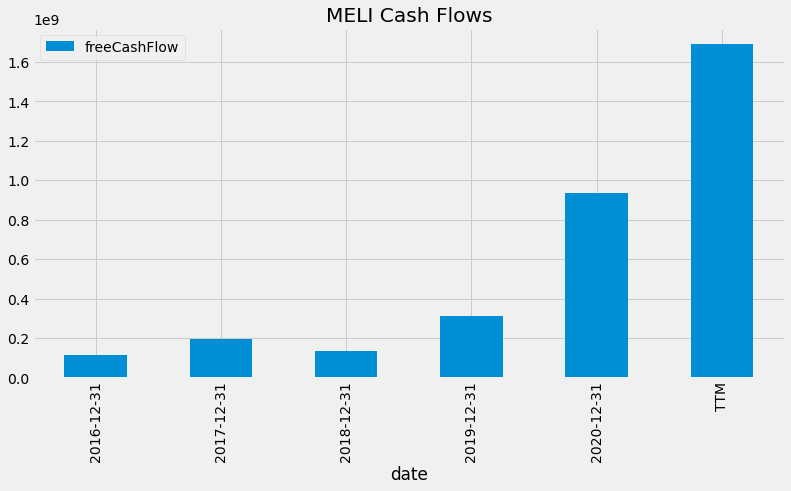

In [30]:

final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [32]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=annual' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,1856394000,1241306000,3097700000,1376338000,118140000.0,15403000,5346807000,694898000,85211000,...,314115000,-468284000,0.0,1651578000,6526332000,0.000000e+00,1385614000,-470780000,NaN,NaN
2019-12-31,NaN,1384740000,1597241000,2981981000,597520000,8626000.0,200729000,3788856000,444706000,87609000,...,322592000,-407000000,-408349000.0,2081963000,4781691000,1.861224e+09,699173000,-685567000,NaN,NaN
2018-12-31,NaN,440332000,461541000,901873000,491229000,4612000.0,113409000,1511123000,165614000,88883000,...,503432000,-392000000,-394306000.0,336700000,2239519000,7.376770e+08,733713000,293381000,NaN,NaN
2017-12-31,NaN,388260000,209432000,597692000,622707000,2549000.0,63971000,1286919000,114837000,92279000,...,537925000,-283000000,-283647000.0,325779000,1673187000,2.441520e+08,368414000,-19846000,NaN,NaN
2016-12-31,NaN,234140000,253321000,487461000,339622000,1103000.0,41275000,869461000,124261000,91797000,...,550641000,-260000000,-259226000.0,428854000,1367435000,4.071240e+08,313523000,79383000,NaN,NaN


In [33]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  1689800000.0
Total Debt:  1385614000.0
Cash and ST Investments:  3097700000.0


In [34]:
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 1554.3,
 'EPS next 5Y': 20.5,
 'Beta': 1.47,
 'Shs Outstand': 49820000.0}

In [35]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  8.5


In [42]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  1689800000.0
Total Debt:  1385614000.0
Cash and ST Investments:  3097700000.0
EPS Growth 5Y:  20.5
EPS Growth 6Y to 10Y:  10.25
EPS Growth 11Y to 20Y:  4.0
Discount Rate:  6.5
Shares Outstanding:  49820000.0


Discounted Cash Flows

Year 1: $1911933333.3333337
Year 2: $2163267292.644758
Year 3: $2447640457.875055
Year 4: $2769396011.02295
Year 5: $3133448068.810005
Year 6: $3243780747.289231
Year 7: $3357998379.236035
Year 8: $3476237758.7866
Year 9: $3598640496.7720437
Year 10: $3725353190.320356
Year 11: $3637903584.913775
Year 12: $3552506787.145846
Year 13: $3469114609.043831
Year 14: $3387679993.8080606
Year 15: $3308156989.258576
Year 16: $3230500721.9050884
Year 17: $3154667371.6256266
Year 18: $3080614146.939579
Year 19: $3008299260.8611856
Year 20: $2937681907.3198433


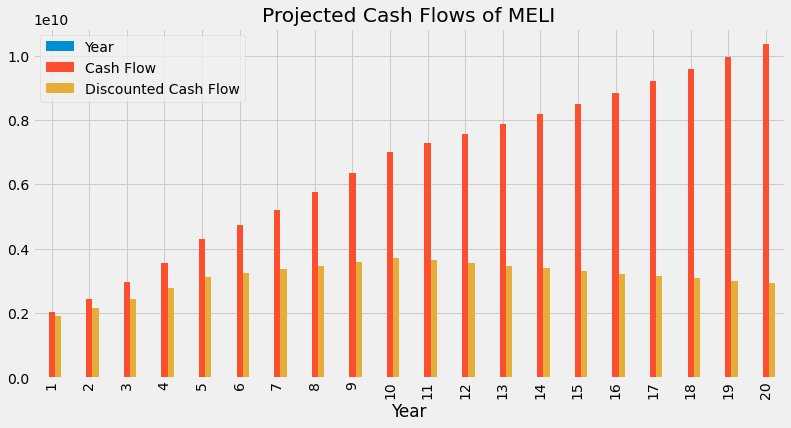

In [43]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)    

In [44]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)   

Intrinsic Value:  1290.7849680632635
Current Price:  1554.3
Margin of Safety:  -20.41509921920792
